# Used Car Price Predicting Website Application (UCPPWA)
### APMAE4990 Final Proposal 
## Fanchen Zeng (fz2241)    Season Yang (sy2679)    Yizhe Gao (yg2470)



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
%matplotlib inline

## Introduction

There has been over 10,000 used cars searched within a 75-mile radius from major cities, including Chicago, Washington, New York, Seattle, etc. It is always a hard problem for the owners to price their used cars given the fact that there is a wide distribution of prices for cars with different conditions. They could guess but this is not an efficient way to maximize money for their cars. 

In this project, we will be using the data to create a web app that could help car owners in New York area price their used cars based on specific car conditions. Specifically, users should be able to enter their used car conditions and the web app should generate the range of price which would most likely to maximize price of their cars.

## Audience

1. Used car owners in New York area who want to get estimate prices for their cars. 

2. Used car potential buyers in New York area who need recommendations for potential used car options

3. Practitioners who want to analyze the used car saling market



## Component

### 1. Prodicting System

We decide to use parametric regression (Linear Ridge Regression) and nonparametric regession (Random Forests Regression) models to prodict the used car price

Ridge Regression:

<p align="center"><img src="picture/Ridge.png"></p>



Random Forests Regression:

<p align="center"><img src="picture/Random Forests2.png" ></p>

### 2. Recommendation System

To better serve the potential buyers, our team decides to use PCA to reduce the dimension as well as extract features and k-nearest neighbors algorithm to predict where is the optimal range in which the people would potentially buy.

<p align="center"><img src="picture/KNN.png"></p>
<h6 align="center">Fig.2. kNN Algorithm </h6> 




### 3. Feedback Learning System

In order to generate data to improve predicting accuracy, our team introduce a feedback learning system in the UCPPWA.

The feedback learning system collects real time data on used car price from the price input of users and from website https://www.cargurus.com/, http://www.autotrader.com/ and so on.

Not only updata the dataset in UCPPWA, our time decide to give reasonable weight to the new data, where the weight can be learned from empirical market research or regression result of existed dataset with time series



<p align="center"><img src="picture/hypersphere.png"></p>


<p align="center"><img src="picture/weighted sample.png"></p>
<h6 align="center">Fig.1. Weighted Sample</h6> 

## Interface
## 1.  Flask
   As suggested by Dr.Goldman, begin with a simple webapp design using python flask.

   Let user input their car attributes, such as brand, model, purchased year, mileages and etc....Then we return the result to the user.
   
   Then dependens on our progress, we also plan to use google map API. 
<p align="center"><img src="picture/flaskapp.png" ></p>


## 2. Visualization Website Application

Inspired by the demonstration of building classification in New York and San Francisco. Our team decides to create a website application to demonstrate our dataset and our systems in UPCCWA

## Preliminary result

In [4]:
df = pd.read_csv('data/autos.csv')
features = df.columns.values
print len(df.price)
df.head()

371528


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
features

array(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'], dtype=object)

In [6]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
# Choose 'seller', 'price', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer' and 'notRepairedDamage' for analysis
df['used_month'] = (2017 - df['yearOfRegistration']) * 12 + (4 - df['monthOfRegistration'])
dd_df = df.drop_duplicates(features[i] for i in [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15])
dd_df = dd_df[['price', 'used_month', 'gearbox', 'powerPS', 'kilometer', 'notRepairedDamage', 'fuelType']]
dd_df = dd_df[(dd_df.price >= 10)
            & (dd_df.price <= 1e6)
            & (dd_df.used_month >= 0)
            & (dd_df.used_month <= 500)
            & (dd_df.powerPS >= 30)
            & (dd_df.powerPS <= 800)]
dd_df['notRepairedDamage'].fillna('nRD_unknown', inplace=True)
dd_df['gearbox'].fillna('gear_unknown', inplace=True)
dd_df['fuelType'].fillna('fueltype_unknown', inplace=True)
dd_df_gearbox = pd.get_dummies(dd_df['gearbox'])
dd_df_notRepairedDamage = pd.get_dummies(dd_df['notRepairedDamage'])
dd_df_fuelType = pd.get_dummies(dd_df['fuelType'])
dd_df = pd.concat([dd_df.drop(['gearbox', 'notRepairedDamage', 'fuelType'], axis=1), dd_df_gearbox, 
                   dd_df_notRepairedDamage, dd_df_fuelType], axis=1)


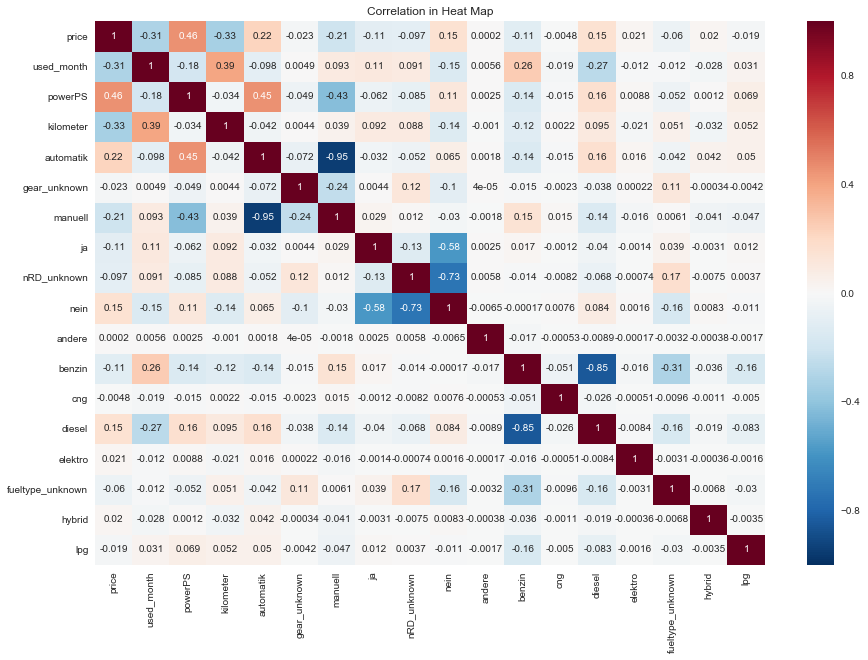

In [10]:
corr = dd_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation in Heat Map')
plt.show()

## Feasibility

## 1. 
Predicting System which uses Ridge Regression and Random Forests Regression can be easily solved and improved by tuning the alpha in Ridge and tree parameters in Random Forests. By now we have achieved about 0.6 R Square for Ridge and more than 0.8 R Square for Random Forests in testing dataset



## 2. 
The two key parts in Feedback Learning System are receiving feedback and using updated dataset to re-learn. We will design the web application to be able to receive and store inputs from the users as new data and the algorithms will run automatically after a given period of time to learn the updated data to update the coefficients in Ridge and the decision tree in Random Forests.

## 3. 
Although the popular algorithm of recommendation system is Collaborative Filtering which is mainly used in Facebook, Netflix and so on, kNN is also applied for basic recommendation system and own a good performance. Thus, applying and modifying the kNN to our Recommendation System are feasible

## 4. 
A large number of APIs and open code for website are the useful tools for us to build the Visualization Website Application



## Thank You

## Reference

1. [Ridge Regression](https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/lectures/Lecture%203%20-%20Model%20Selection%2C%20Evaluation%20and%20Regularization.pdf)

2. [How does random forest works](https://www.quora.com/How-does-randomization-in-a-random-forest-work)

3. [Weighted sample](http://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html)

4. [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

5. [Recommendation System based on kNN](http://stackoverflow.com/questions/7742706/k-nearest-neighbour-vs-user-based-nearest-neighbour)

6. [Visualization Website Application](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)